In [732]:
import pandas as pd
import numpy as np
%matplotlib inline
from pandas.tseries.offsets import DateOffset

In [873]:
data=pd.read_csv("perrin-freres-monthly-champagne.csv")    #monthly average sales data

In [874]:
data.head(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [735]:
data.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [736]:
data=data.dropna(axis=0)               #dropping null values

In [737]:
data.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [738]:
data.columns

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')

In [739]:
data.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'Sales'},inplace=True)

C:\Users\MY AMOUR\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [740]:
data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [741]:
data['Month']=pd.to_datetime(data['Month'])

<ipython-input-741-adc5d978eec1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month']=pd.to_datetime(data['Month'])


In [742]:
data

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [743]:
  import matplotlib.pyplot as plt

In [744]:
x=data['Month']
y=data['Sales']

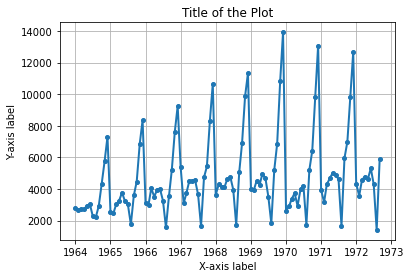

In [745]:
plt.plot(x, y, 'o-', linewidth=2, markersize=4)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Plot')
plt.grid(True)
plt.show()

In [746]:
from statsmodels.tsa.stattools import adfuller

In [747]:
test=adfuller(data['Sales'])

In [748]:
test

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [797]:
def adfuller_test(data):
    # Perform ADF test
    result = adfuller(data)

    # Extract ADF test statistics and p-value
    adf_statistic = result[0]          
    p_value = result[1]

    # Define significance levels
    significance_levels = {
        0.01: 'highly stationary',
        0.05: 'stationary',
        0.1: 'marginally stationary',
    }

    # Check if the data is stationary
    stationary = False
    for level, interpretation in significance_levels.items():
        if p_value < level:
            stationary = True
            break

    # Print ADF test statistics and interpretation
    print(f'ADF Statistic: {adf_statistic:.2f}')
    print(f'p-value: {p_value}')
    if stationary:
        print('The sales data is', interpretation)
    else:
        print('The sales data is not stationary')



In [798]:
# Example usage
sales_column = data['Sales']  # Replace 'sales' with the actual column name of your sales data
adfuller_test(sales_column)

ADF Statistic: -1.83
p-value: 0.3639157716602447
The sales data is not stationary


In [751]:
data['Sales_difference_1'] = data['Sales'].diff(periods=1)

<ipython-input-751-89fc8f0e7ff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales_difference_1'] = data['Sales'].diff(periods=1)


In [752]:
data

,Month,Sales,Sales_difference_1
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,-143.0
2,1964-03-01,2755.0,83.0
3,1964-04-01,2721.0,-34.0
4,1964-05-01,2946.0,225.0
...,...,...,...
100,1972-05-01,4618.0,-170.0
101,1972-06-01,5312.0,694.0
102,1972-07-01,4298.0,-1014.0
103,1972-08-01,1413.0,-2885.0


In [753]:
data['Seasonal_difference_2']=data['Sales'].diff(periods=12)
data

<ipython-input-753-62f3fd557f6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Seasonal_difference_2']=data['Sales'].diff(periods=12)


,Month,Sales,Sales_difference_1,Seasonal_difference_2
0,1964-01-01,2815.0,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN
2,1964-03-01,2755.0,83.0,NaN
3,1964-04-01,2721.0,-34.0,NaN
4,1964-05-01,2946.0,225.0,NaN
...,...,...,...,...
100,1972-05-01,4618.0,-170.0,-392.0
101,1972-06-01,5312.0,694.0,438.0
102,1972-07-01,4298.0,-1014.0,-335.0
103,1972-08-01,1413.0,-2885.0,-246.0


In [754]:
adfuller_test(data['Seasonal_difference_2'].dropna())

ADF Statistic: -7.627
p-value: 2.060579696813685e-11
The sales data is highly stationary


In [755]:
x=data['Month']
y=data['Seasonal_difference_2']

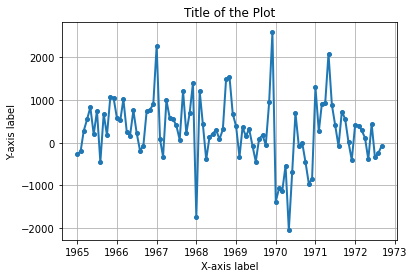

In [756]:
plt.plot(x, y, 'o-', linewidth=2, markersize=4)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Plot')
plt.grid(True)
plt.show()

In [757]:
adfuller_test(data['Sales_difference_1'].dropna())

ADF Statistic: -7.190
p-value: 2.5196204473869244e-10
The sales data is highly stationary


In [758]:
x=data['Month']
y=data['Sales_difference_1']

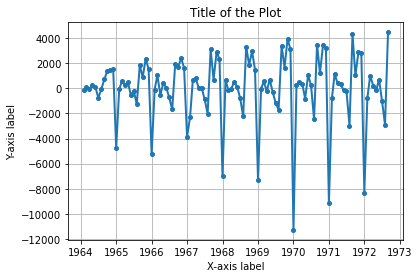

In [759]:
plt.plot(x, y, 'o-', linewidth=2, markersize=4)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Title of the Plot')
plt.grid(True)
plt.show()

In [760]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


In [761]:
x = data['Sales_difference_1']
y = data['Seasonal_difference_2']

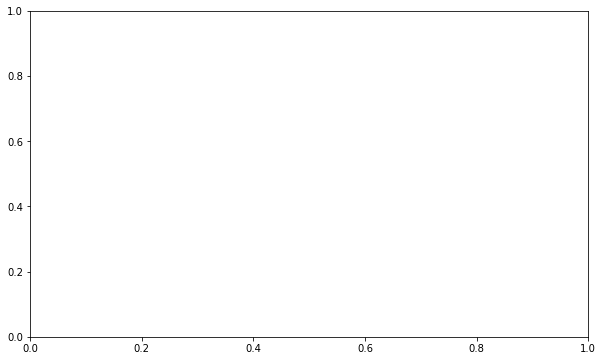

In [762]:
fig, ax1 = plt.subplots(figsize=(10, 6))


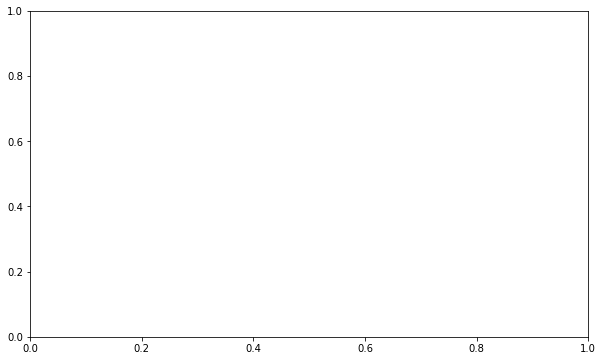

In [763]:
fig2, ax2 = plt.subplots(figsize=(10, 6))


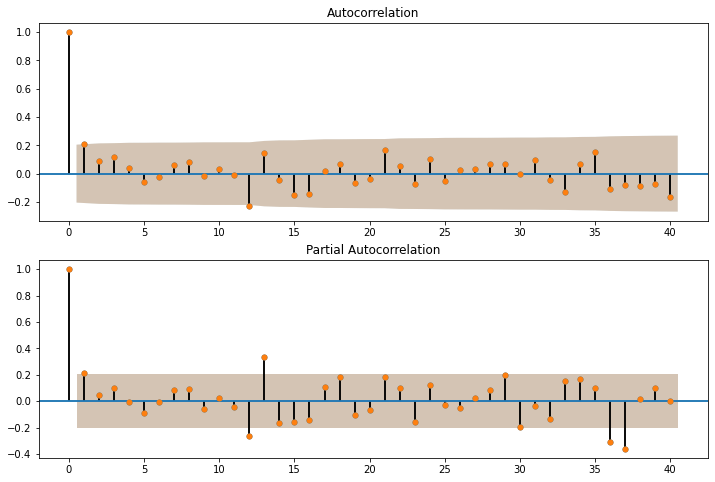

In [799]:
sm.graphics.tsa.plot_acf(y.iloc[13:], lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(y.iloc[13:], lags=40, ax=ax2)

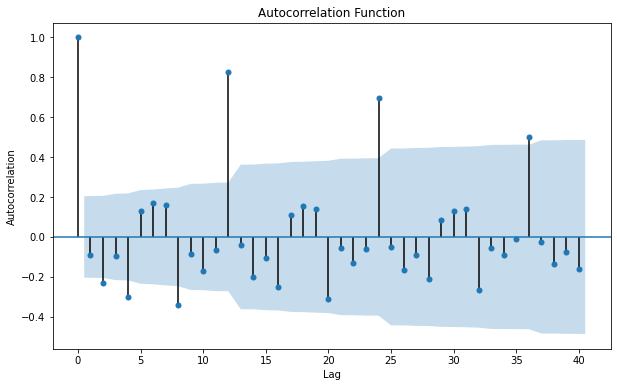

In [800]:

def plot_acf_with_xlabel(data, lags):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax1)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title('Autocorrelation Function')
    plt.show()

# Example usage
y = data['Sales_difference_1']
plot_acf_with_xlabel(y.iloc[13:], lags=40)

In [801]:
x = data['Sales_difference_1']
y = data['Seasonal_difference_2']

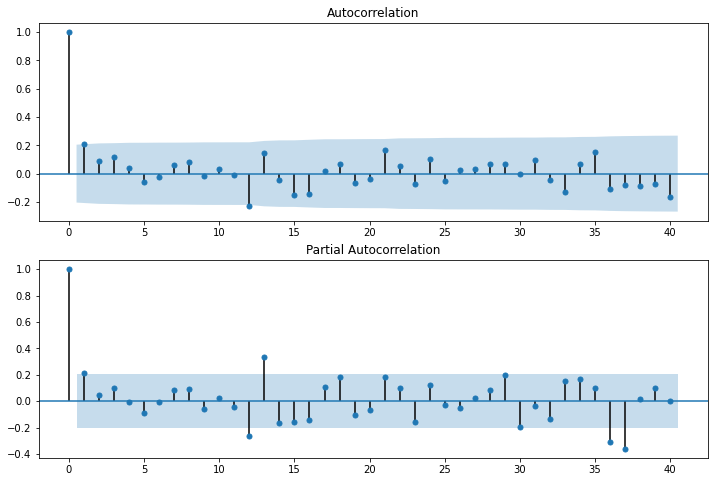

In [802]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(y.iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(y.iloc[13:],lags=40,ax=ax2)

In [803]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
res=model.fit()

C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<ipython-input-804-5fcd6404610c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


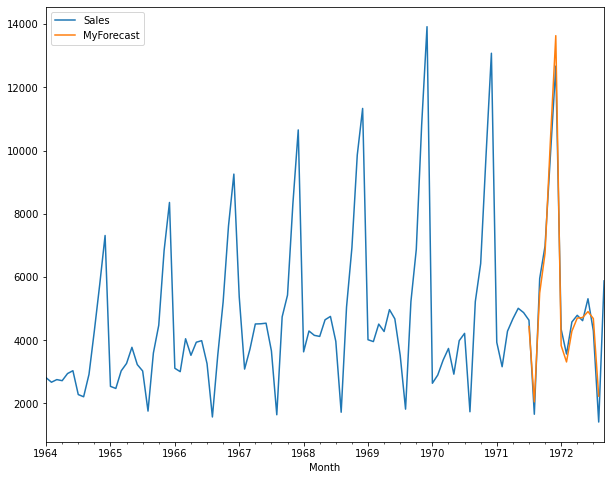

In [804]:
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-805-c5835202245c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


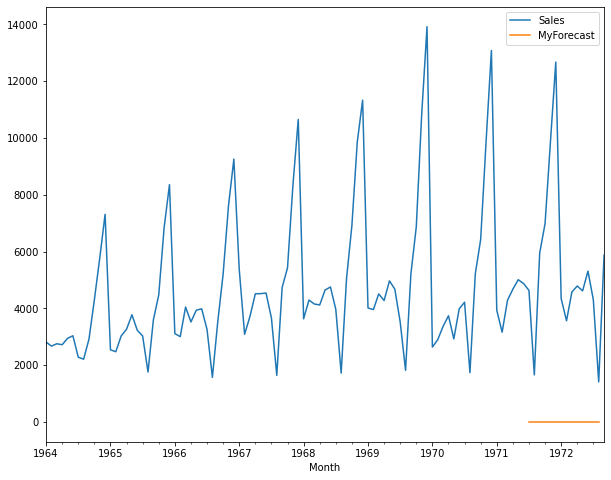

In [805]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(0,0,0),seasonal_order=(0,0,0,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
<ipython-input-771-2aca6598c49c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


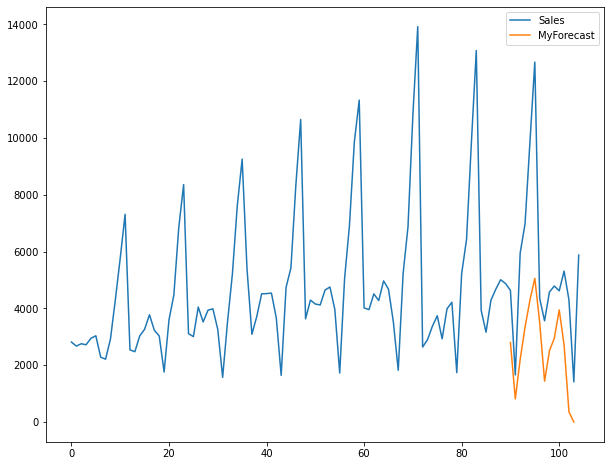

In [771]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(0,0,1),seasonal_order=(0,0,1,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

<ipython-input-772-841f00f4da72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


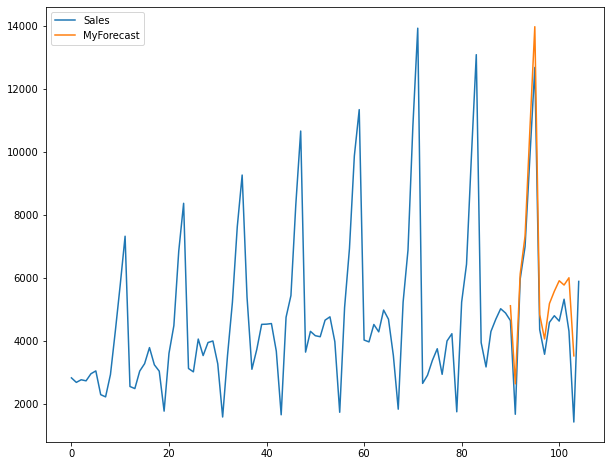

In [772]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(0,1,0),seasonal_order=(0,1,0,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

In [773]:
data

,Month,Sales,Sales_difference_1,Seasonal_difference_2,MyForecast
0,1964-01-01,2815.0,NaN,NaN,NaN
1,1964-02-01,2672.0,-143.0,NaN,NaN
2,1964-03-01,2755.0,83.0,NaN,NaN
3,1964-04-01,2721.0,-34.0,NaN,NaN
4,1964-05-01,2946.0,225.0,NaN,NaN
...,...,...,...,...,...
100,1972-05-01,4618.0,-170.0,-392.0,5898.0
101,1972-06-01,5312.0,694.0,438.0,5762.0
102,1972-07-01,4298.0,-1014.0,-335.0,5993.0
103,1972-08-01,1413.0,-2885.0,-246.0,3514.0


<ipython-input-774-b10dcfb50a9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


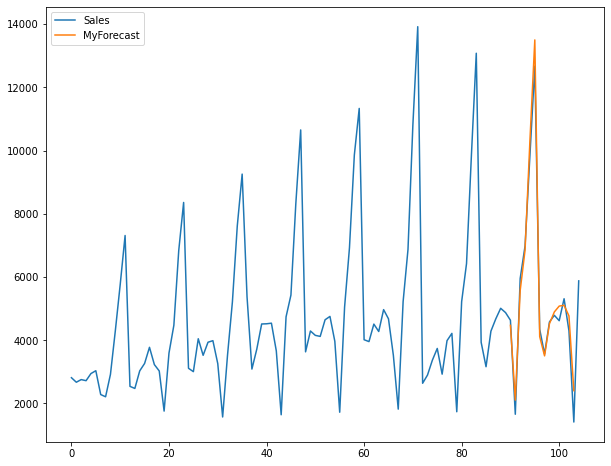

In [774]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(0,1,1),seasonal_order=(0,1,1,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
<ipython-input-775-1c40b428a44c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


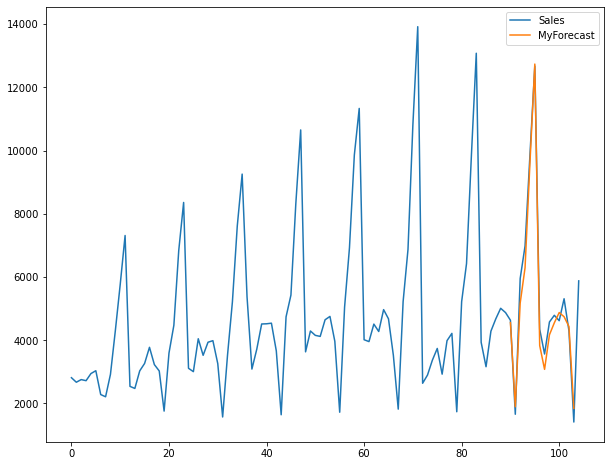

In [775]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,0,0),seasonal_order=(1,0,0,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

C:\Users\MY AMOUR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
<ipython-input-776-293d62780073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


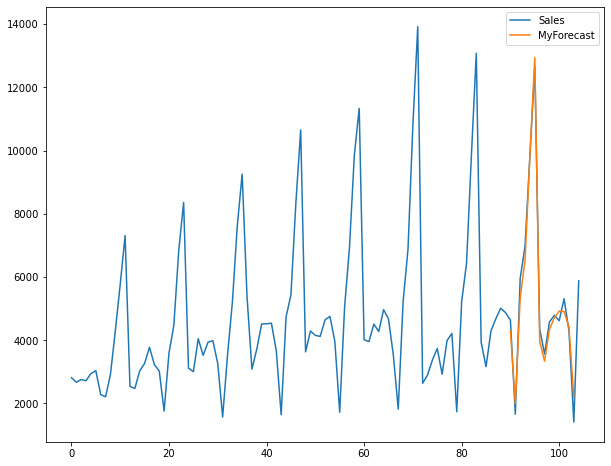

In [776]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,0,1),seasonal_order=(1,0,1,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

<ipython-input-777-d6c6c07de9f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


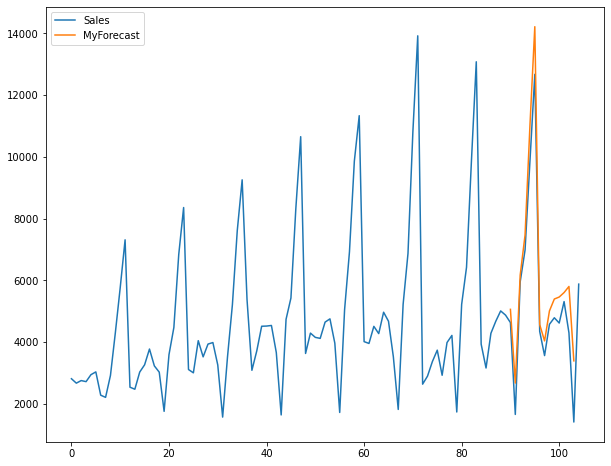

In [777]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,0),seasonal_order=(1,1,0,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

<ipython-input-778-aa5143aa70ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MyForecast']=res.predict(start=90,end=103,dynamic=True)


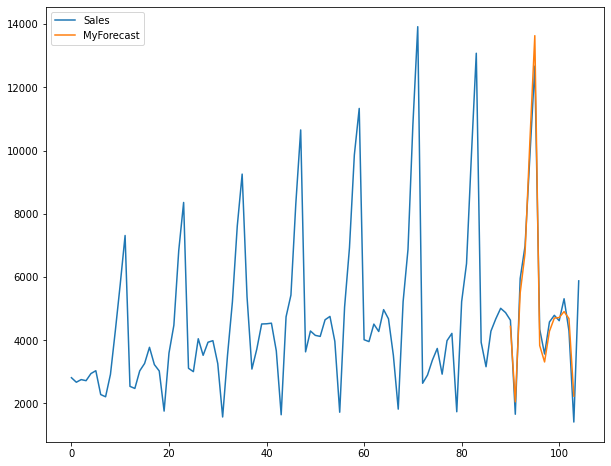

In [778]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
res=model.fit()
data['MyForecast']=res.predict(start=90,end=103,dynamic=True)
data[['Sales','MyForecast']].plot(figsize=(10,8))

# Future prediction

In [860]:
data.tail()

,Sales,Sales_difference_1,Seasonal_difference_2,MyForecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,NaN
1972-06-01,5312.0,694.0,438.0,NaN
1972-07-01,4298.0,-1014.0,-335.0,NaN
1972-08-01,1413.0,-2885.0,-246.0,NaN
1972-09-01,5877.0,4464.0,-74.0,NaN


In [861]:
start_date_unseen = pd.to_datetime('1972-09-01')
end_date_unseen = pd.to_datetime('1973-09-01')
unseen_dates = pd.date_range(start=start_date_unseen, end=end_date_unseen, freq='MS')

unseen_dates


DatetimeIndex(['1972-09-01', '1972-10-01', '1972-11-01', '1972-12-01',
               '1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01',
               '1973-05-01', '1973-06-01', '1973-07-01', '1973-08-01',
               '1973-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [862]:

predictions = res.predict(start=len(data), end=len(data) + len(unseen_dates) - 1, dynamic=True)
predictions_df = pd.DataFrame({'Month': unseen_dates, 'MyForecast': predictions})
predictions_df

,Month,MyForecast
1972-10-01,1972-09-01,7023.702075
1972-11-01,1972-10-01,9996.177537
1972-12-01,1972-11-01,12891.998206
1973-01-01,1972-12-01,4561.379350
1973-02-01,1973-01-01,3718.695905
1973-03-01,1973-02-01,4792.239761
1973-04-01,1973-03-01,5034.489103
1973-05-01,1973-04-01,5047.831156
1973-06-01,1973-05-01,5488.453637
1973-07-01,1973-06-01,4593.505769


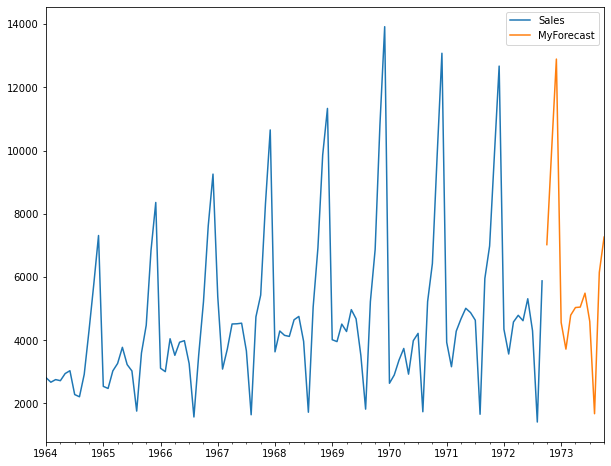

In [863]:
merged_data = pd.concat([data, predictions_df], ignore_index=False)

merged_data[['Sales', 'MyForecast']].plot(figsize=(10, 8))

In [868]:
from flask import Flask, render_template


In [867]:
!pip install flask

In [870]:


app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/display_results', methods=['POST'])
def display_results():
    dates = pd.date_range(start='2023-01-01', periods=24, freq='MS')
    sales = np.random.randint(low=100, high=300, size=24)

    plt.figure(figsize=(10, 8))
    plt.plot(dates, sales)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title('Sales Forecast')
    plt.grid(True)
    plt.tight_layout()

    plot_path = 'static/plot.png'
    plt.savefig(plot_path)

    return render_template('result.html', plot_path=plot_path)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1